In [1]:
import pandas as pd

In [13]:
df = pd.read_csv('llm_eval_set.csv', header=1).dropna()

In [14]:
df

,Question,Answer
0,"Hi, sorry if that has been answered before, bu...",you can find how to do this here though: https...
1,Hello! I am new to w&b and have been using it ...,Hey! Glad you're enjoying the course. W&B is c...
2,"Hi, I wanted to know how much is the limit for...",are you hitting any limits? I think for practi...
3,"Hello, the model I am using for a baseline int...",Filesystem References\nAnother common pattern ...
4,"Hello, question: I am uploading images to arti...",I wouldn’t use Table as a way of storing image...
5,"Hello, can't we add two same aliases to differ...",This seems like a good use case for “Tags” as ...
6,I have a question for the wandb team @Darek Kł...,"in wandb.agent(sweep_id=sweep_id, function=tra..."
7,I would like to know if is there a way to chan...,"not sure if I get the question correctly, but ..."


In [15]:
len(df)

8

In [17]:
from prompt import prompt_template

In [18]:
print(prompt_template)

You are an AI assistant for the open source library wandb. The documentation is located at https://docs.wandb.ai.
You are given the following extracted parts of a long document and a question. Provide a conversational answer with a hyperlink to the documentation.
You should only use hyperlinks that are explicitly listed as a source in the context. Do NOT make up a hyperlink that is not listed.
If the question includes a request for code, provide a code block directly from the documentation.
If you don't know the answer, just say "Hmm, I'm not sure." Don't try to make up an answer.
If the question is not about wandb, politely inform them that you are tuned to only answer questions about wandb.

QUESTION: How to log audio with wandb?
Content: Weights & Biases supports logging audio data arrays or file that can be played back in W&B. You can log audio with `wandb.Audio()`
Source: 28-pl
Content: # Log an audio array or file
wandb.log({{"my whale song": wandb.Audio(
    array_or_path, capti

In [19]:
len(prompt_template.split())

392

In [21]:
import os 
from langchain.document_loaders import UnstructuredMarkdownLoader

def find_md_files(directory):
    md_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".md"):
                file_path = os.path.join(root, file)
                md_files.append(file_path)
    return md_files

def load_documents(files):
    docs = []
    for file in files:
        loader = UnstructuredMarkdownLoader(file)
        docs.extend(loader.load())
    return docs

In [22]:
files = find_md_files('../docodile/docs/')

In [23]:
len(files)

267

In [28]:
documents = load_documents(files)  

[nltk_data] Downloading package punkt to /Users/darek/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/darek/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [33]:
lengths = []
for i in range(len(documents)):
    lengths.append(len(documents[i].page_content.split()))

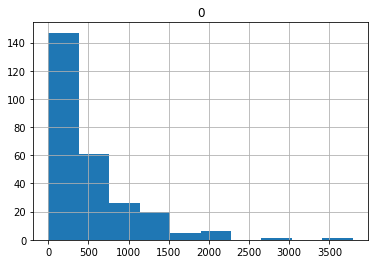

In [35]:
pd.DataFrame(lengths).hist();

In [71]:
def load_documents(files):
    docs = []
    for file in files:
        fname = file.split('/')[-1]
        loader = UnstructuredMarkdownLoader(file)
        markdown_splitter = MarkdownTextSplitter(chunk_size=2048, chunk_overlap=128)
        markdown_docs = loader.load()
        markdown_docs = [x.page_content for x in markdown_docs]
        chunks = markdown_splitter.create_documents(markdown_docs)
        for chunk in chunks: chunk.metadata["source"] = fname # need to add the source to doc
        docs.extend(chunks)
    return docs

In [72]:
from langchain.text_splitter import MarkdownTextSplitter

documents = load_documents(files)  

In [73]:
len(documents)

666

In [49]:
lengths = []
for i in range(len(documents)):
    lengths.append(len(documents[i].page_content.split()))

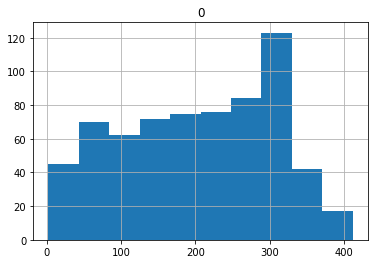

In [50]:
pd.DataFrame(lengths).hist();

In [74]:
print(documents[2])

page_content="Do you offer local, on-prem installs?\nYes, you can privately host W&B locally on your own machines or in a private cloud, try this quick tutorial notebook to see how. Note, to login to wandb local server you can set the host flag to the address of the local instance.  ****\n\nHow do I turn off wandb logging temporarily?\nIf you're testing code and want to disable wandb syncing, set the environment variable WANDB_MODE=offline." lookup_str='' metadata={'source': 'quickstart.md'} lookup_index=0
